In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('COVID_Cleaned.csv')
df1 = pd.read_csv('MD_COVID_NewCasesByDate.csv')

df = df.transpose()
#df.to_csv('test.csv')
df = df.drop('Unnamed: 0')
df = df.reset_index()

df.columns = df.iloc[0]

df = df.rename(columns={'Date':'Zip Code'})
df = df.drop([0,0])
df.to_csv('COVID_Cleaned_Transposed.csv')
latestCases = pd.DataFrame()

latestCases['Zip Code'] = df['Zip Code']
latestCases['Total Cases'] = df.iloc[:,-1]

latestCases['Zip Code'] = latestCases['Zip Code'].map(lambda x : x.rstrip('0').rstrip('.'))
latestCases['Zip Code'] = latestCases['Zip Code'].astype(int)
latestCases['Total Cases'] = latestCases['Total Cases'].astype(int)

meanList = []
medianList = []
#[rows : columns]
#loop through rows to calculate mean/median new cases per day per zip code
for x in range(0,len(df1.index)):
    #add values to list
    meanList.append(df1.iloc[x,2:].mean())
    medianList.append(df1.iloc[x,2:].median())

#add to latest cases
latestCases.insert(2,'meanNewCases',meanList)
latestCases.insert(3,'medianNewCases',medianList)

In [10]:
#Empirical Cumulative Distribution Function
def ecdf(df):
    n = len(df)
    x = np.sort(df)
    y = np.arange(1, n + 1) /n
    return x, y

#squash and sort data for ECDF plotting
x_totalCases, y_totalCases = ecdf(latestCases['Total Cases'])
x_meanCases, y_meanCases = ecdf(latestCases['meanNewCases'])
x_medianCases, y_medianCases = ecdf(latestCases['medianNewCases'])

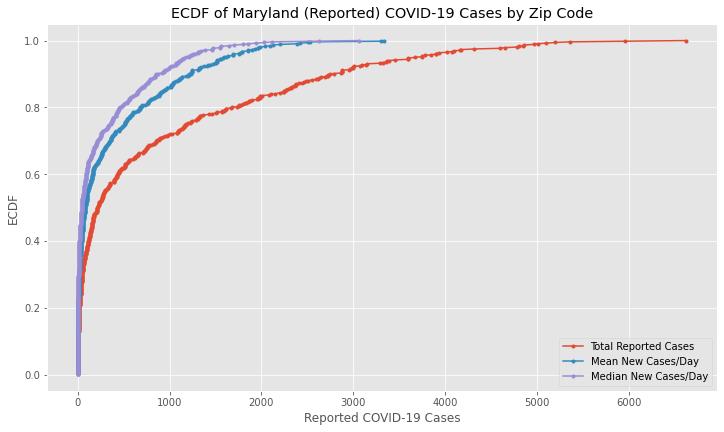

In [11]:
#plot ECDF of Mean new cases daily vs total cases
_ = plt.figure(figsize=(12,6.75))
_ = plt.style.use('ggplot')
_ = plt.plot(x_totalCases,y_totalCases,marker='.',linestyle='-')
_ = plt.plot(x_meanCases,y_meanCases,marker='.',linestyle='-')
_ = plt.plot(x_medianCases,y_medianCases,marker='.',linestyle='-')
_ = plt.legend(('Total Reported Cases','Mean New Cases/Day','Median New Cases/Day'),loc='lower right')
_ = plt.xlabel('Reported COVID-19 Cases')
_ = plt.ylabel('ECDF')
_ = plt.title('ECDF of Maryland (Reported) COVID-19 Cases by Zip Code')
plt.show()

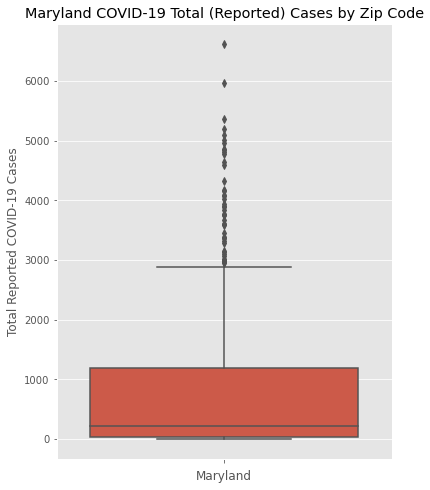

In [12]:
#boxplot of total cases by zip
_ = plt.figure(figsize=(6,8))
_ = plt.style.use('ggplot')
_ = sns.boxplot(y='Total Cases',data=latestCases[['Zip Code','Total Cases']])
_ = plt.xlabel('Maryland')
_ = plt.ylabel('Total Reported COVID-19 Cases')
_ = plt.title('Maryland COVID-19 Total (Reported) Cases by Zip Code')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 24.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


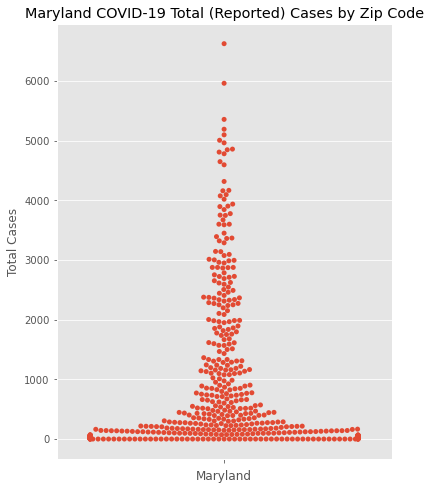

In [13]:
#swarmplot of total cases by zip
_ = plt.figure(figsize=(6,8))
_ = plt.style.use('ggplot')
_ = sns.swarmplot(y='Total Cases',data=latestCases[['Zip Code','Total Cases']])
_ = plt.xlabel('Maryland')
_ = plt.title('Maryland COVID-19 Total (Reported) Cases by Zip Code')
plt.show()

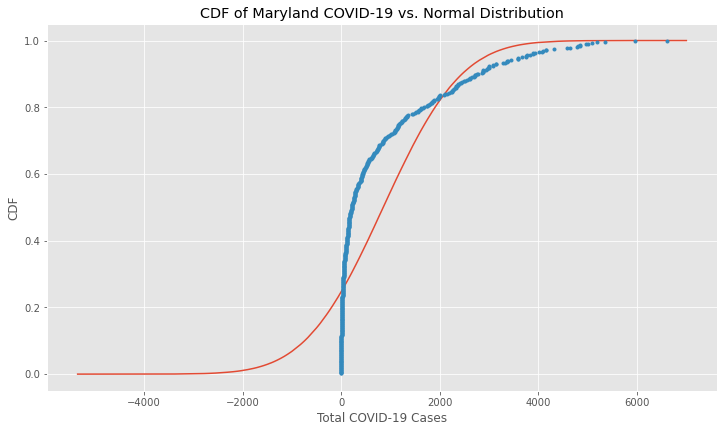

In [14]:
incMean = np.mean(latestCases['Total Cases'])
incStd = np.std(latestCases['Total Cases'])

samples = np.random.normal(incMean,incStd,size=1000000)
def ecdf(df):
    n = len(df)
    x = np.sort(df)
    y = np.arange(1, n + 1) /n
    return x, y
x_theor, y_theor = ecdf(samples)
x, y = ecdf(latestCases['Total Cases'])

_ = plt.figure(figsize=(12,6.75))
_ = plt.style.use('ggplot')
_ = plt.plot(x_theor,y_theor)
_ = plt.plot(x,y,marker='.',linestyle='none')
_ = plt.xlabel('Total COVID-19 Cases')
_ = plt.ylabel('CDF')
_ = plt.title('CDF of Maryland COVID-19 vs. Normal Distribution')
plt.show()